# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [24]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, EstType, PlotType)
from lib import (stack, fpoints, fcurve, curve, perform_est)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [25]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, npts=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_MEAN, φ=φ, μ=μ)
    fcurve(ar, data_type=DataType.CUMU_MEAN, func_type=DataType.AR1_OFFSET_MEAN, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, npts=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_SD, φ=φ, σ=σ)
    fcurve(ar, data_type=DataType.CUMU_SD, func_type=DataType.AR1_OFFSET_SD, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Simulation $\varphi$ Scan

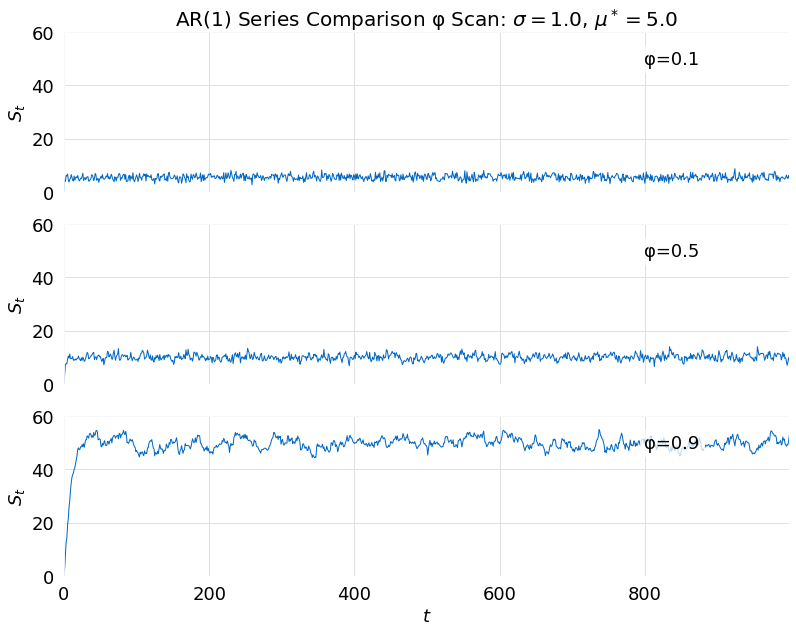

In [29]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: $σ={{{σ}}}$, $μ^*={{{μ}}}$"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

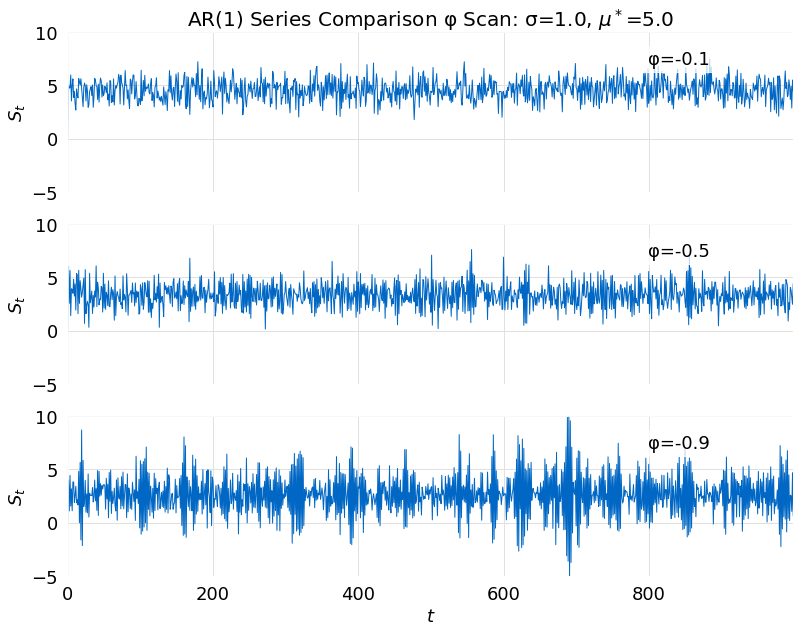

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

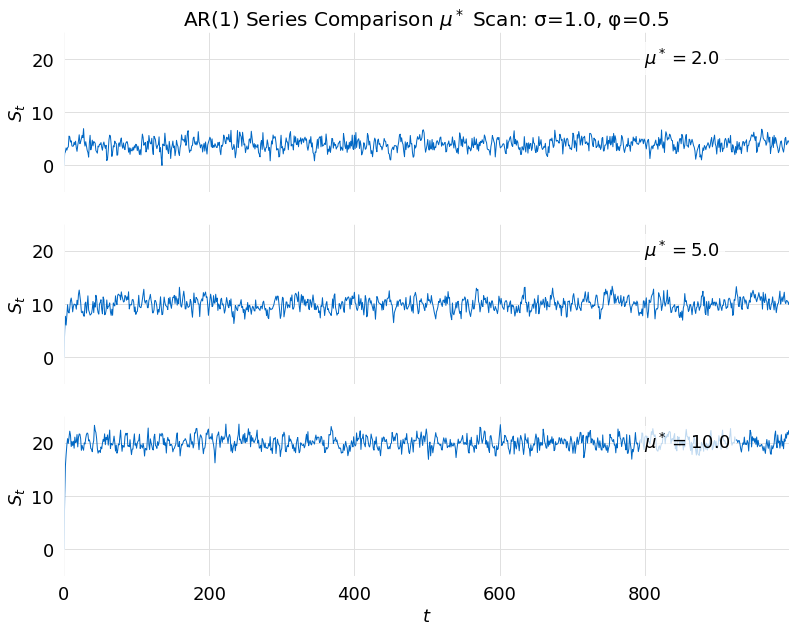

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

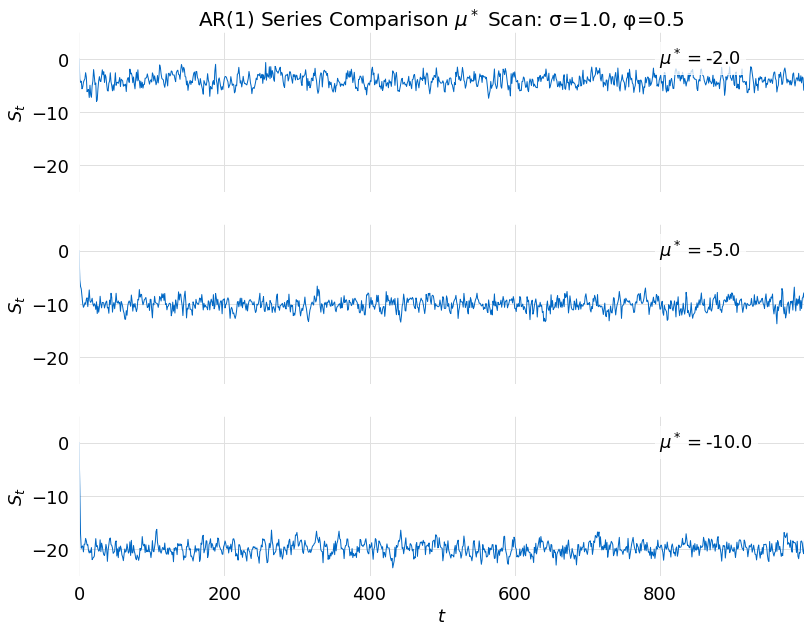

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

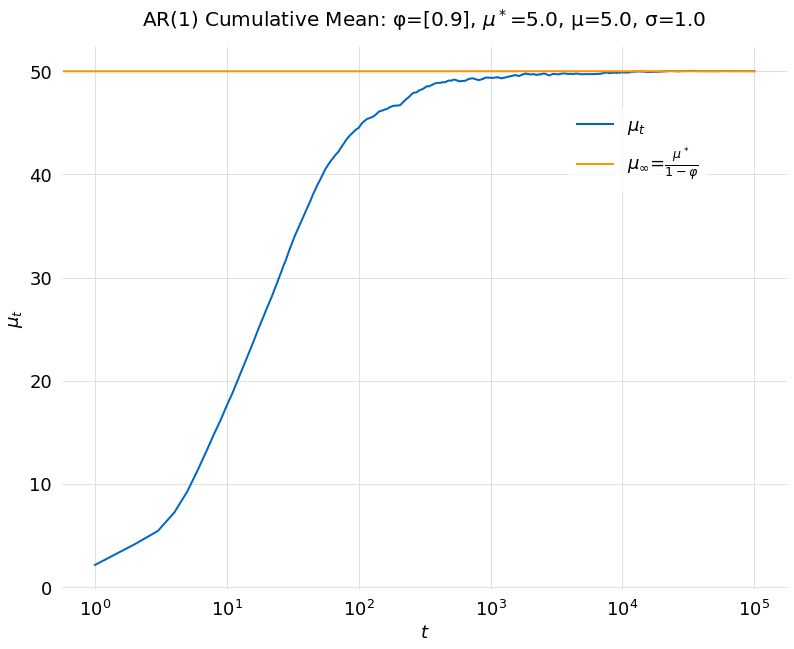

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

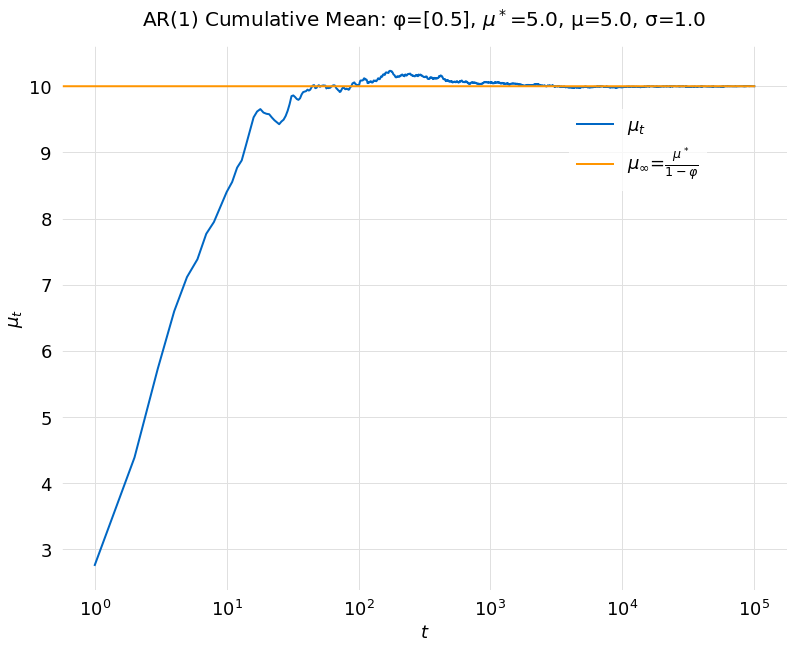

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

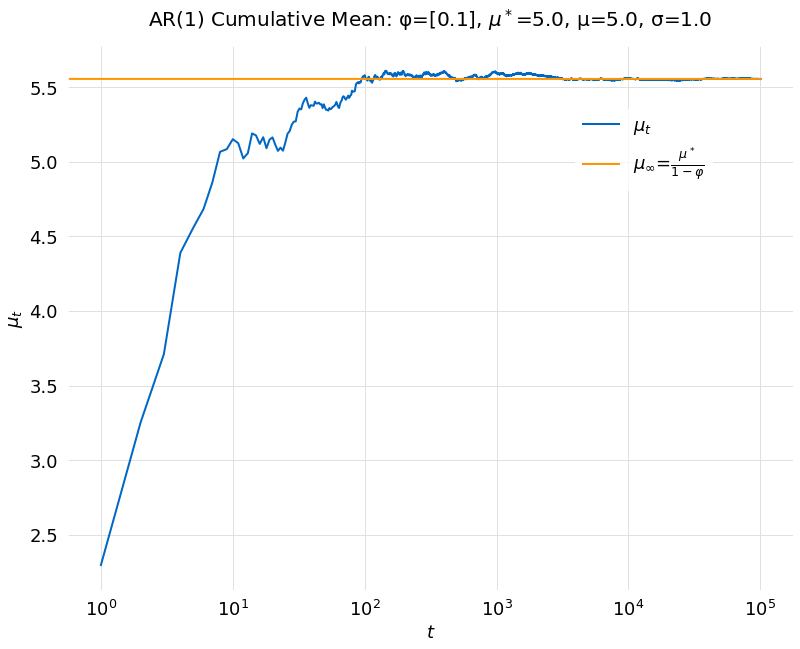

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

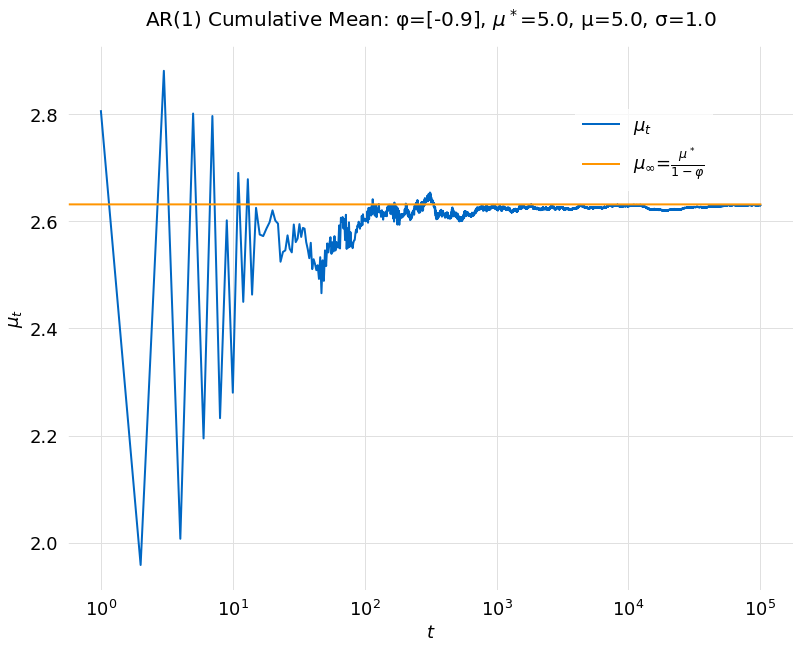

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

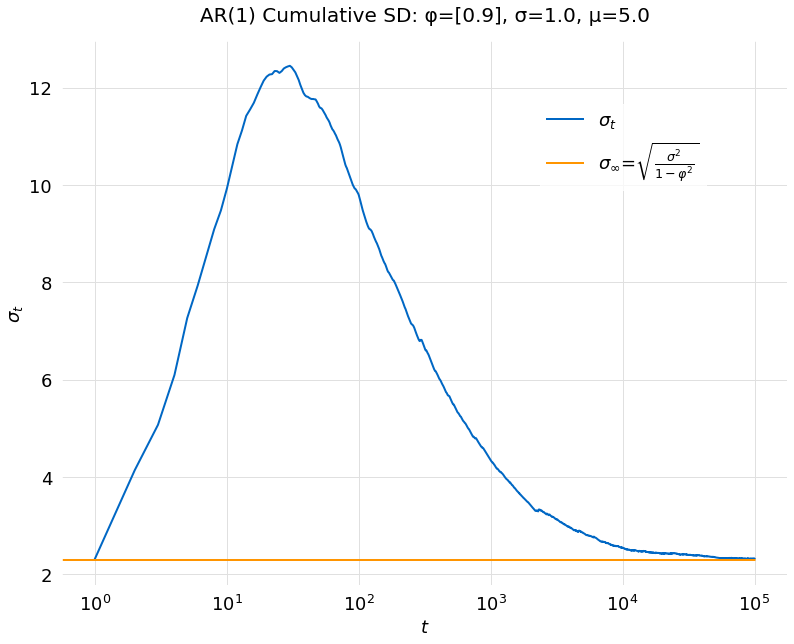

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

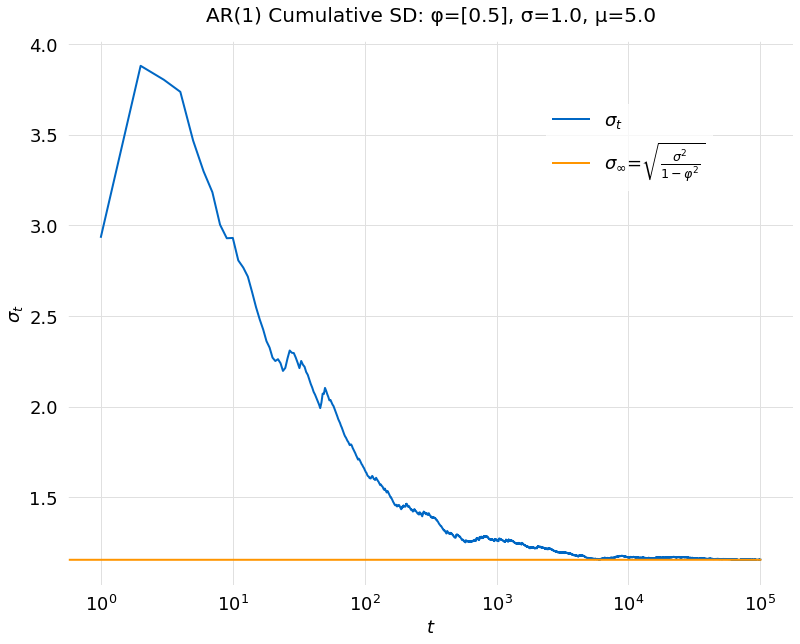

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

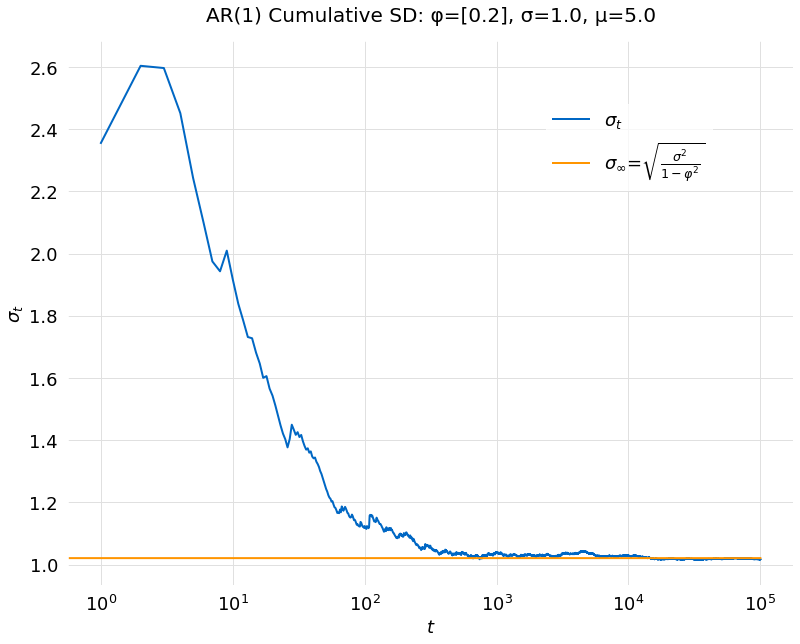

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

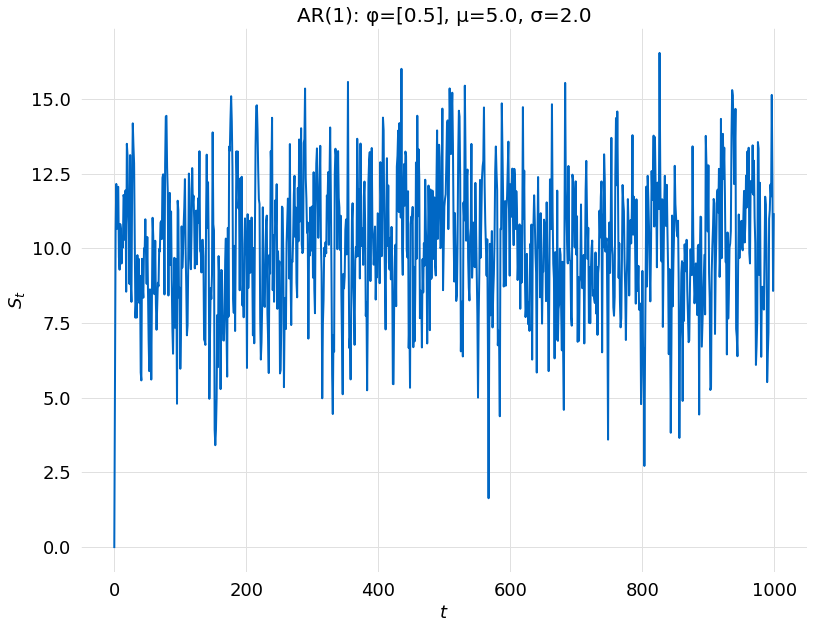

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [15]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2113.206
Date:                Sat, 21 May 2022   AIC                           4232.412
Time:                        14:11:36   BIC                           4247.135
Sample:                             0   HQIC                          4238.008
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0647      0.126     79.656      0.000       9.817      10.312
ar.L1          0.4978      0.027     18.110      0.000       0.444       0.552
sigma2         4.0073      0.173     23.225      0.000       3.669       4.345
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 9.74
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               1.02   Skew:                            -0.20
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [10.064679069603667, 0.12635123925563407],
    'Parameters': [[0.49778736112200417, 0.027486673369924153]],
    'Sigma2': [4.007289981584088, 0.17254476355446918]}},
  'Tests': {}},
 'Date': '21/05/2022 14:11:36',
 'Name': 'AR(1)-Simulation-8ba13994-266f-4530-8689-01a026f1c4e6',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

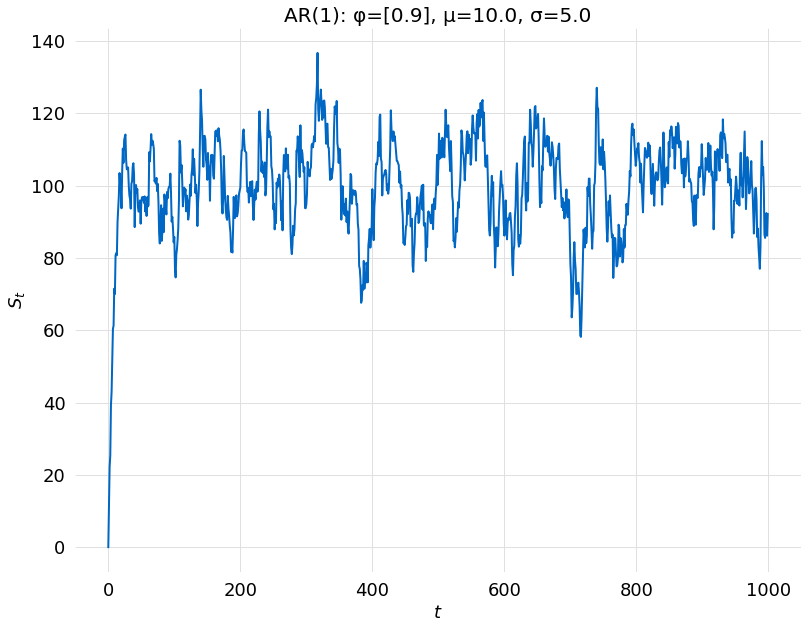

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [18]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3072.027
Date:                Sat, 21 May 2022   AIC                           6150.055
Time:                        14:11:36   BIC                           6164.778
Sample:                             0   HQIC                          6155.651
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.7930      2.881     33.942      0.000      92.146     103.440
ar.L1          0.9450      0.005    192.708      0.000       0.935       0.955
sigma2        27.2203      1.163     23.399      0.000      24.940      29.500
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                81.76
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [97.79296526369991, 2.8811525676287677],
    'Parameters': [[0.945031388191686, 0.004903952733983794]],
    'Sigma2': [27.220321375954907, 1.1632988705300562]}},
  'Tests': {}},
 'Date': '21/05/2022 14:11:36',
 'Name': 'AR(1)-Simulation-63ca3a76-6020-4411-b21a-d5bab26b8370',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

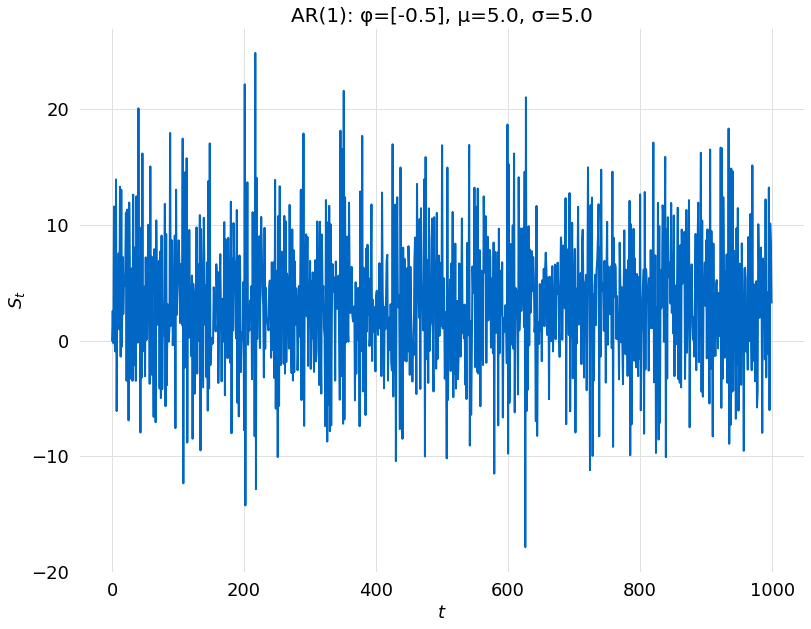

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [21]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3044.758
Date:                Sat, 21 May 2022   AIC                           6095.517
Time:                        14:11:36   BIC                           6110.240
Sample:                             0   HQIC                          6101.113
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2893      0.105     31.395      0.000       3.084       3.495
ar.L1         -0.5439      0.028    -19.740      0.000      -0.598      -0.490
sigma2        25.8239      1.155     22.364      0.000      23.561      28.087
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.40
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.02   Skew:                             0.16
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [3.2893428550472543, 0.10477246396045165],
    'Parameters': [[-0.5439208950205726, 0.027553914946048582]],
    'Sigma2': [25.823913674411834, 1.1547318620508533]}},
  'Tests': {}},
 'Date': '21/05/2022 14:11:36',
 'Name': 'AR(1)-Simulation-507a3720-011d-419a-8e35-29bdbc1c8dce',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}